<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Multiple_Linear_Regression(Cars_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

# **Read the data**

In [2]:
cars = pd.read_csv('/content/Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# **Check for missing values**

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
 cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# **Correlation Matrix**

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# **Scatterplot between variable along with Histogram**

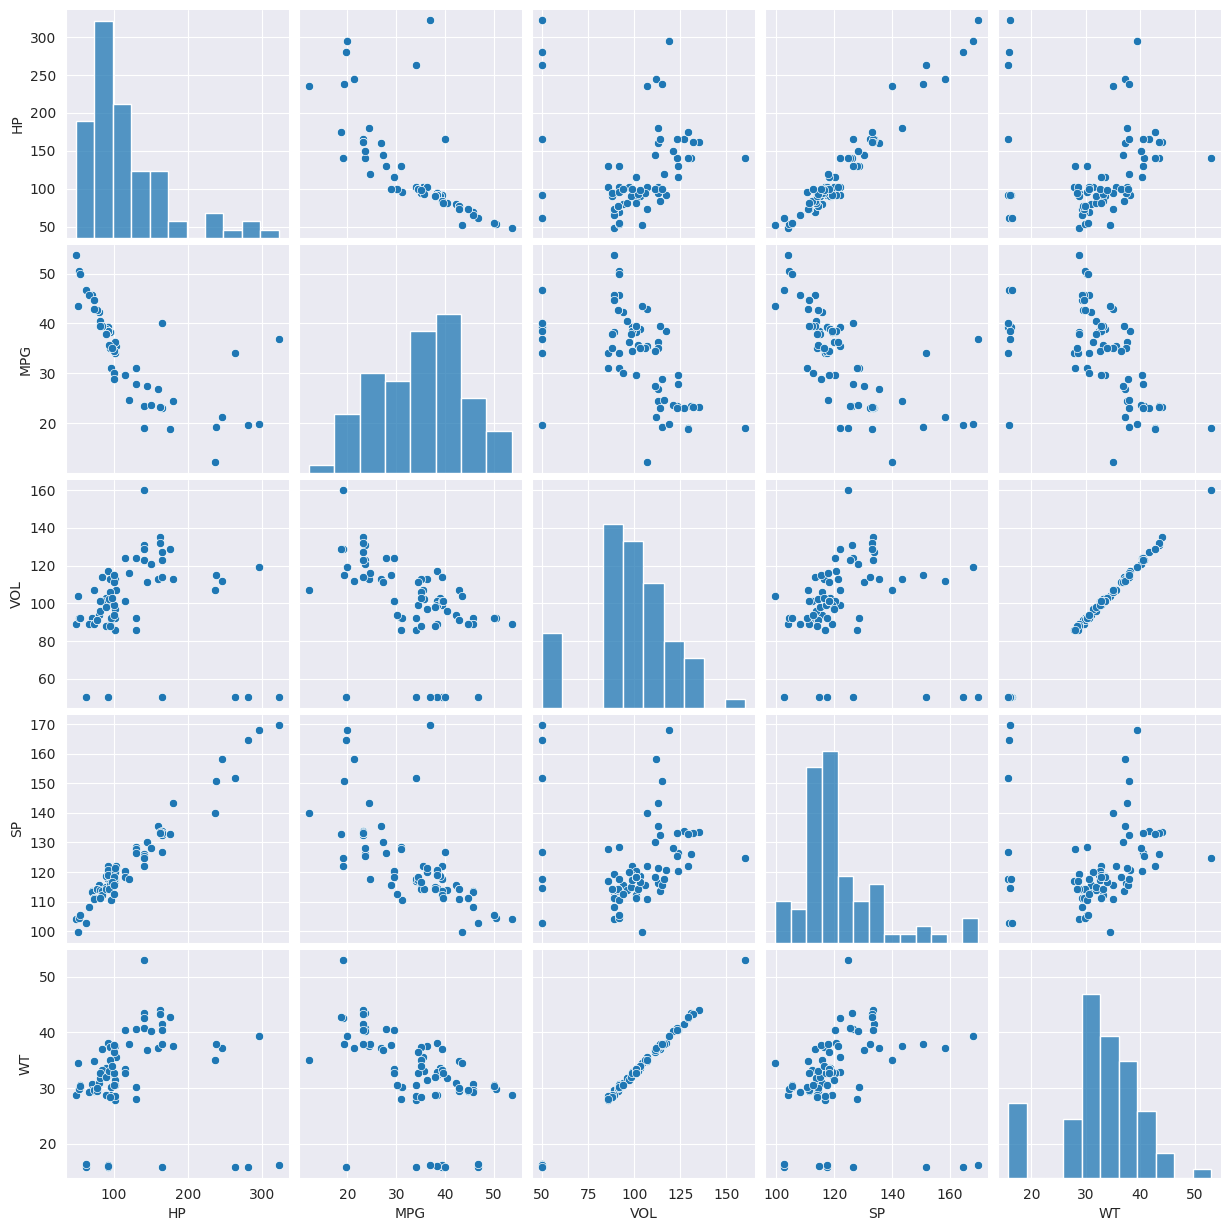

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# **Preparing a Model**
## Build Model

In [7]:
# Build model
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
# coefficients Beta value
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
# t and p-values
print("*** T-Values ***\n",model.tvalues,'\n\n','*** P-Values ***\n',model.pvalues)

# WT And VOL pvalue is > alpha thats creating a problem here.
# pvalues must be  less than alpha.

*** T-Values ***
 Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 

 *** P-Values ***
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [10]:
# R squared value tells us how good model is.
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

## **Simple Linear Regression Models**

In [11]:
# Build model for volume
ml_v = smf.ols('MPG~VOL',data=cars).fit()
# t and p-values
print("*** T-Values ***\n",ml_v.tvalues,'\n\n','*** P-Values ***\n',ml_v.pvalues)

*** T-Values ***
 Intercept    14.106056
VOL          -5.541400
dtype: float64 

 *** P-Values ***
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [12]:
# Build model for Weight
ml_w = smf.ols('MPG~WT',data=cars).fit()
# t and p-values
print("*** T-Values ***\n",ml_w.tvalues,'\n\n','*** P-Values ***\n',ml_w.pvalues)

*** T-Values ***
 Intercept    14.248923
WT           -5.508067
dtype: float64 

 *** P-Values ***
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


# Build model for Weight+volume

In [13]:
# Build model for Weight+volume
ml_wv = smf.ols('MPG~WT+VOL',data=cars).fit()
# t and p-values
print("*** T-Values ***\n",ml_wv.tvalues,'\n\n','*** P-Values ***\n',ml_wv.pvalues)

*** T-Values ***
 Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 

 *** P-Values ***
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


# **Calculating VIF**
## Finding problem using VIF Method

In [14]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+HP+SP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~VOL+HP+WT',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF' :[vif_hp,vif_wt,vif_vol,vif_sp]}

vif_frame = pd.DataFrame(d1)
vif_frame

# if VIF > 20 - that variable creating a collinearity problem.
# Here, WT and VOL > 20 thats why VOL and WT creating a problem

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


# **Subset Selection**
### Get Solution using Subset selection Method

In [15]:
# Build model with VOL
model = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
print(model.rsquared,model.aic)
# feature with gives you high r squared value and less AIC value should be kept

0.770368341321302 475.9875158854609


In [16]:
# Build model with WT
model = smf.ols('MPG~WT+SP+HP',data=cars).fit()
print(model.rsquared,model.aic)
# feature with gives you high r squared value and less AIC value should be kept

0.7694828139983458 476.29927501529767


# Residual(Errors) Analysis

# Test for Normal Of Residual Q-Q plot

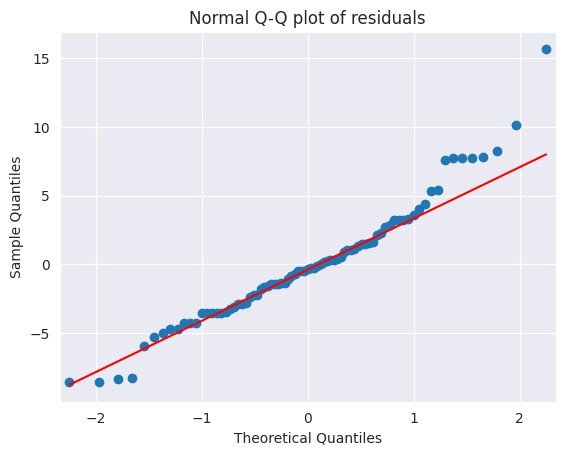

In [17]:
import statsmodels.api as sm
model = smf.ols('MPG~VOL+SP+HP',data=cars).fit()
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [18]:
# to print index of values whoes y value is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

# **Residual plot for homoscedasticity : constant Variable**

In [19]:
# function defination for standardization i.e. z-score
def get_standardized_values(vals):
  return (vals - vals.mean())/vals.std()  # This is z score = (Xi - mean)/std.

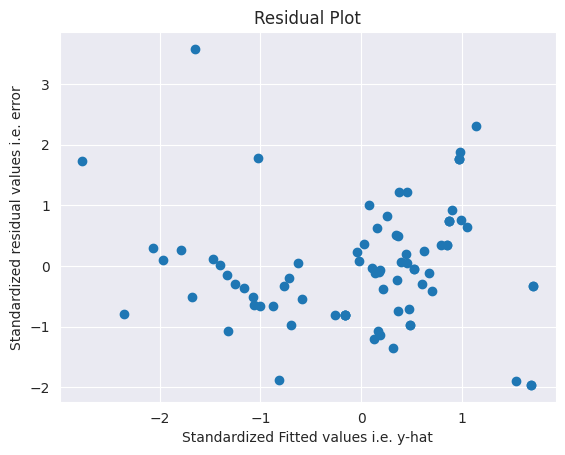

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues), # fittedvalues is y^-hat
           get_standardized_values(model.resid) # resid is error
           )
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values i.e. y-hat')
plt.ylabel('Standardized residual values i.e. error')
plt.show()

# **Residual VS Regressors**

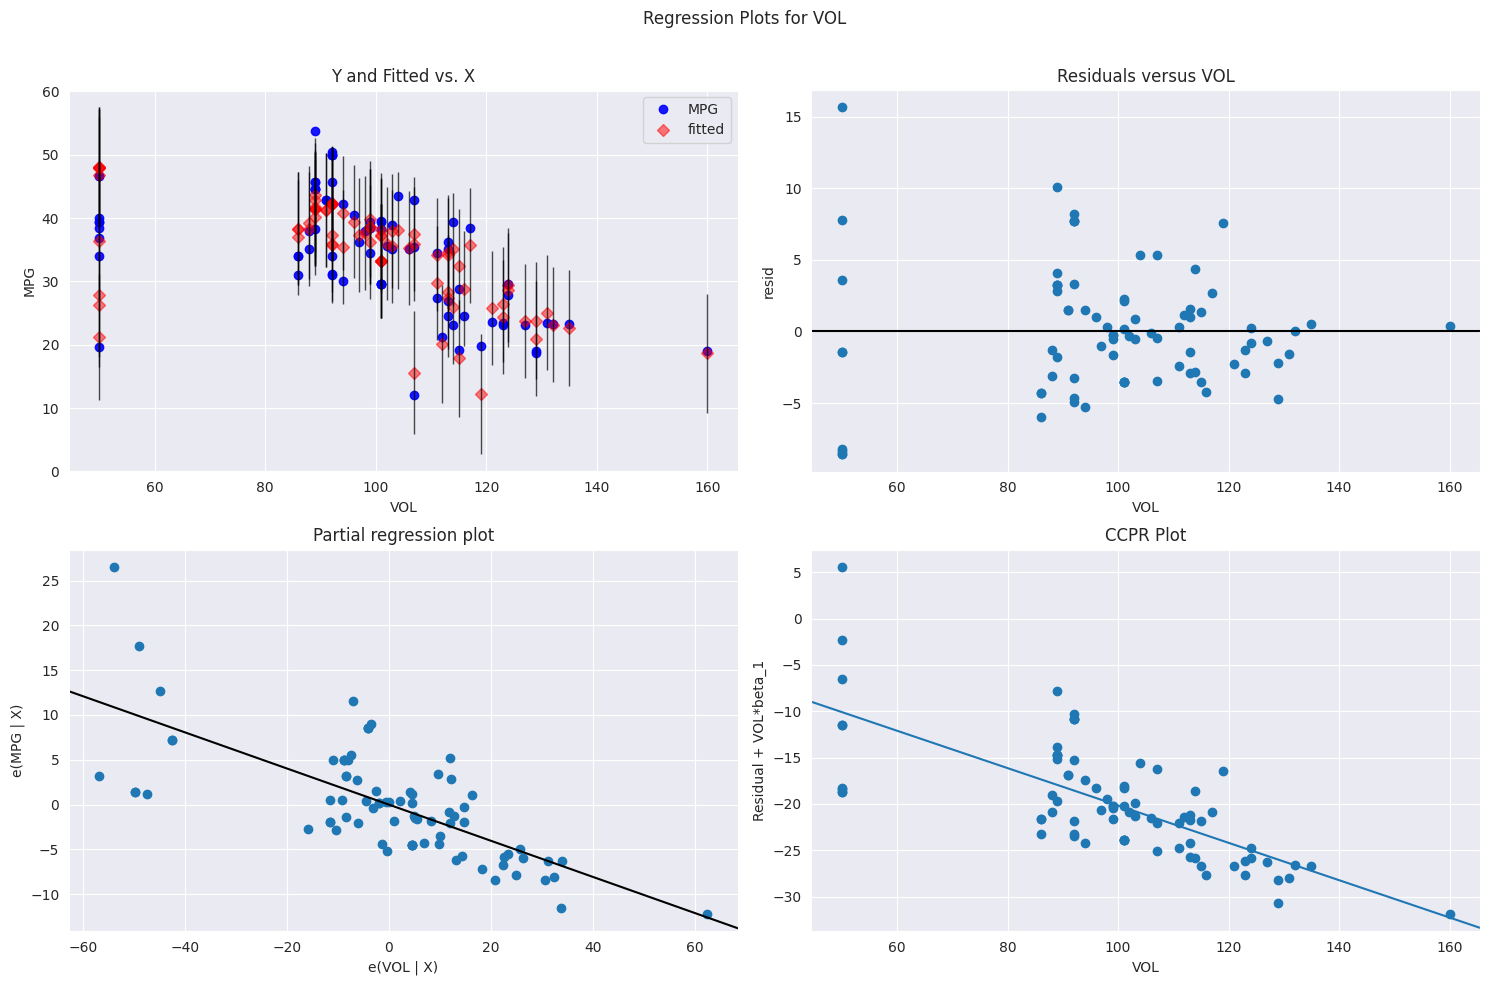

In [21]:
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'VOL',fig=fig)

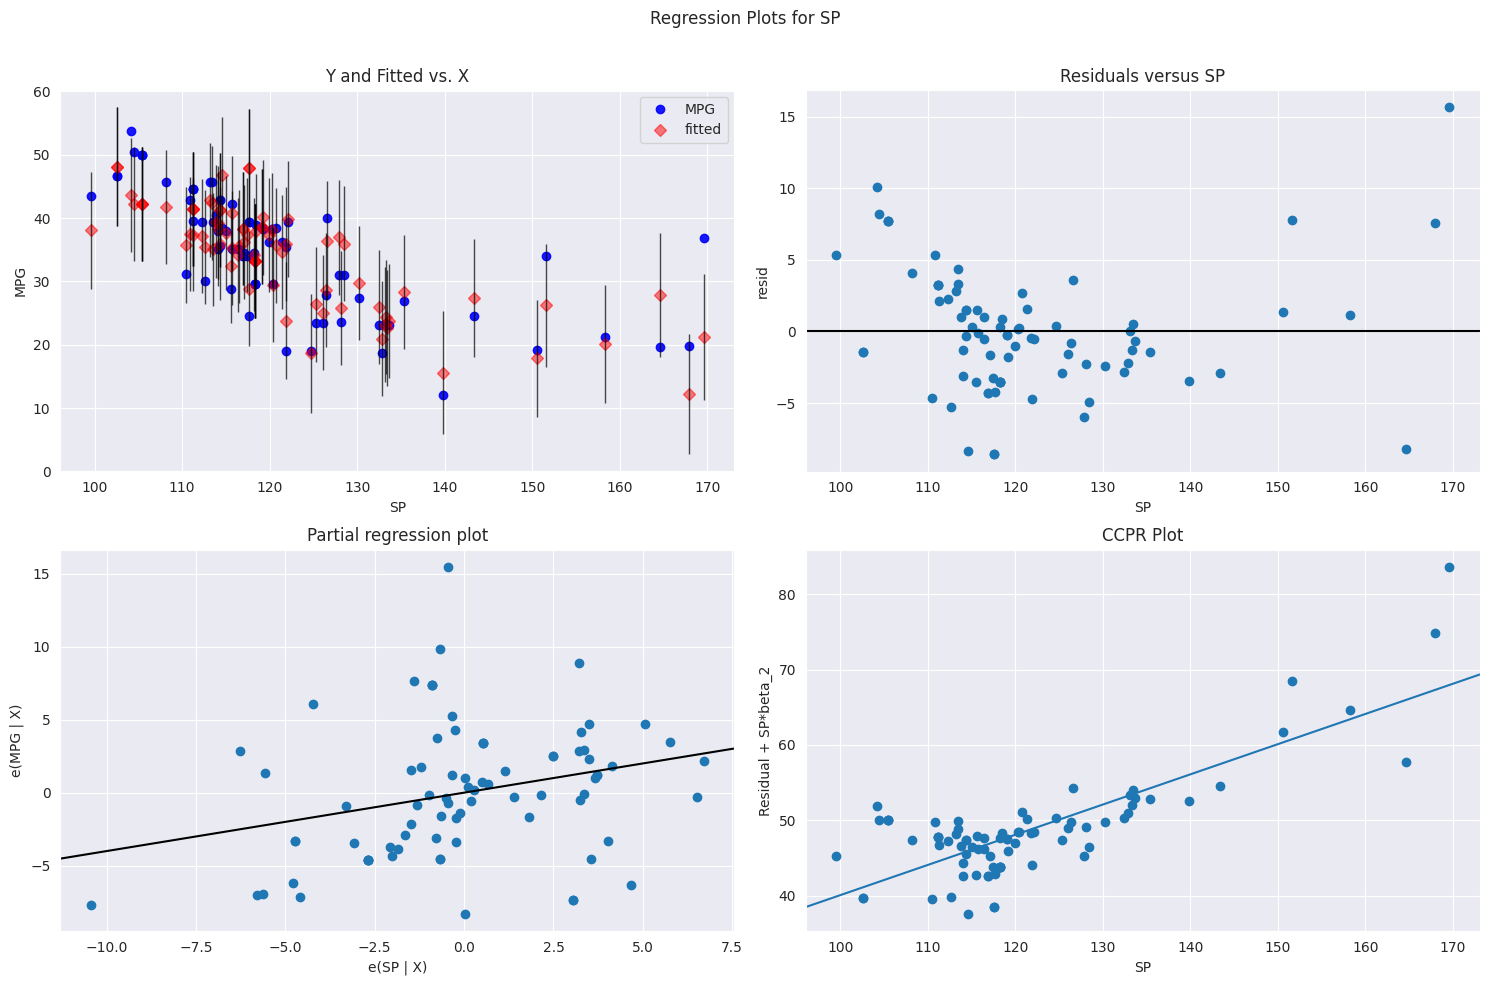

In [22]:
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'SP',fig=fig)

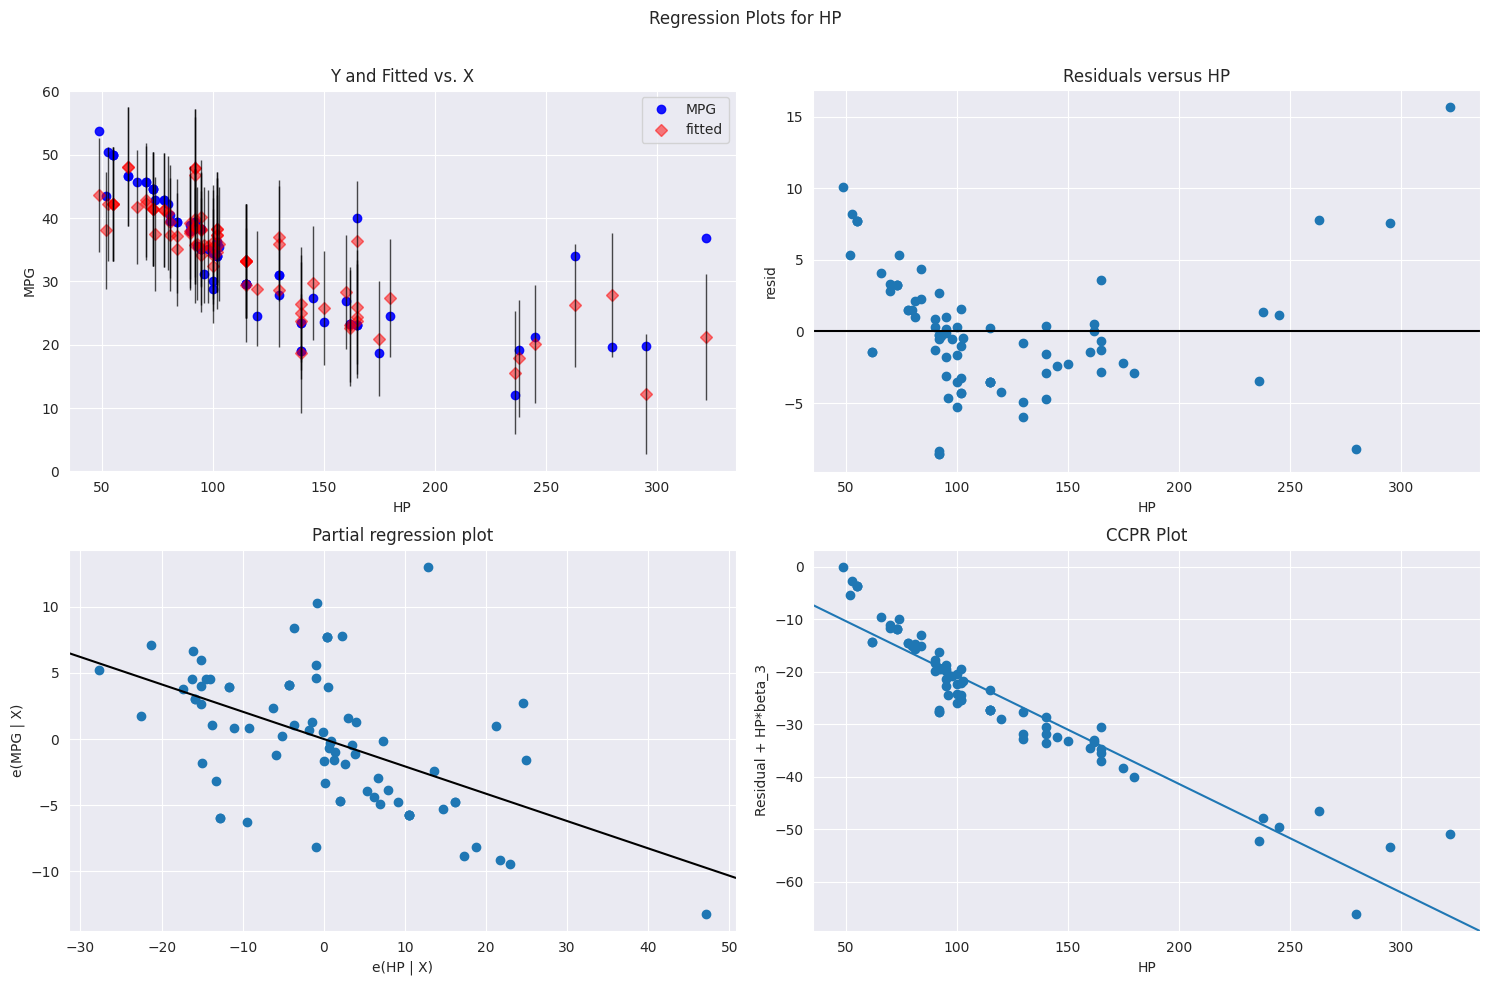

In [23]:
fig =plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)

# **Model Deletion Diagnostics**

## Detecting Influencers/Outliers

## **Cook's Distance**

In [24]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

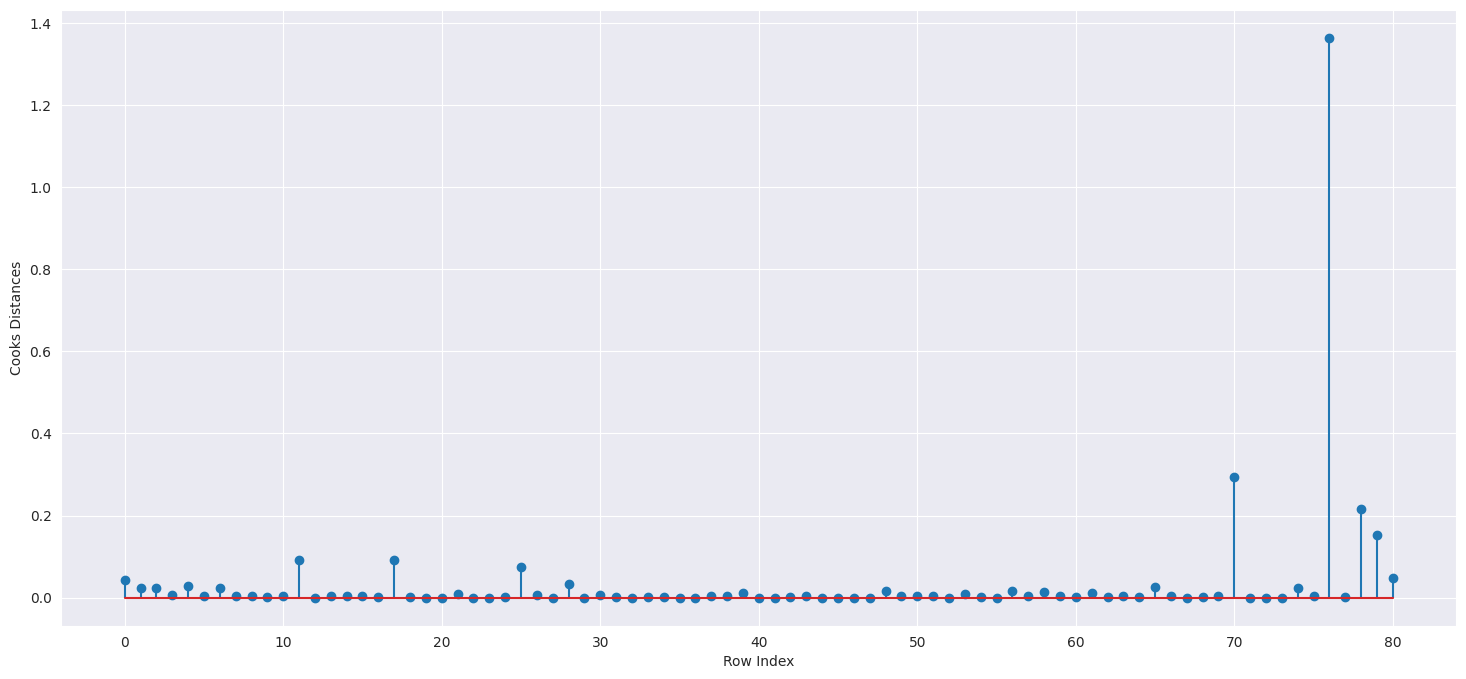

In [25]:
fig = plt.subplots(figsize=(18,8))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distances')
plt.show()

In [26]:
np.argmax(c),np.max(c)
# value , distance

(76, 1.364174386910332)

# High influence point

In [27]:
k = cars.shape[1] #no. of columns
n = cars.shape[0] # no. of rows

leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.2222222222222222

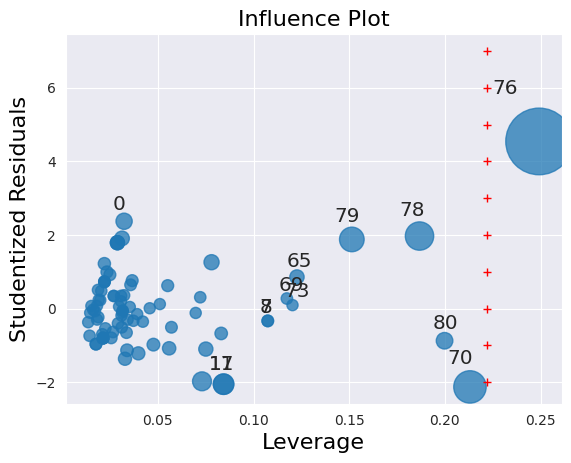

In [33]:
# This is for graph
influence_plot(model,alpha=0.05)

# This code for lopting red line only
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
#**************************************
plt.show()